# Regression and correlation analyses

Regression and correlation analyses are statistical techniques used to examine the **relationships between variables**, enabling us to understand how changes in one variable may affect another. 
By quantifying these relationships, we can **make predictions** and informed decisions based on data.
Much of the advances (and hype) in the field of [AI for Science](https://www.nature.com/articles/d42473-025-00161-3) rest on performing regressions and leveraging correlations!

## Summary of commands

In this exercise, we will demonstrate the following:

- [**NumPy**](https://numpy.org/doc/stable/):
  - [`np.polyfit(x, y, deg)`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) - Construct a least squares polynomial fit of `y` vs. `x` of degree `deg`.
  - [`np.corrcoef(x, y)`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) - Calculate Pearson correlation coefficients between arrays `x` and `y`.
  - [`np.polyval(p, x)`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) - Evaluate a fitted polynomial `p` at specific values `x`.

## Demo

Thermistors are passive devices frequently used to measure temperature.
They are resistive elements whose resistance increases as a function of temperature.
To calibrate a thermistor, a voltage is applied across its terminals and the value of the current is recorded for a given temperature.
The data collected is shown in the table below (current in amperes and voltage in volts).

| $T = 10 ^{\circ}\mathrm{C}$ | | $T = 20 ^{\circ}\mathrm{C}$ | | $T = 30 ^{\circ}\mathrm{C}$ | | $T = 40 ^{\circ}\mathrm{C}$ | | $T = 50 ^{\circ}\mathrm{C}$ | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $I$ | $V$ | $I$ | $V$ | $I$ | $V$ | $I$ | $V$ | $I$ | $V$ |
| 0.11 | 1 | 0.08 | 1 | 0.07 | 1 | 0.04 | 1 | 0.02 | 1 |
| 0.21 | 2 | 0.15 | 2 | 0.11 | 2 | 0.07 | 2 | 0.05 | 2 |
| 0.32 | 3 | 0.23 | 3 | 0.17 | 3 | 0.11 | 3 | 0.07 | 3 |
| 0.42 | 4 | 0.33 | 4 | 0.23 | 4 | 0.15 | 4 | 0.08 | 4 |

### Part (a)

For each value of the temperature, plot on the same set of axes a linear curve fit of the voltage versus current through the thermistor and separately a calibration curve (resistance versus temperature).

```{important}
The coefficients that are returned from `np.polyfit()` always correspond to _decreasing powers_ of $x$.
So for the function $y = ax^2 + bx + c$, the returned coefficients $\vec{p} = \begin{bmatrix} p_0 & p_1 & p_2 \end{bmatrix}$ correspond to $p_0 = a$, $p_1 = b$, and $p_2 = c$.
```

```{note}
Notice how `label=` in the plotting function and `ax.legend()` work together to label different lines!
```

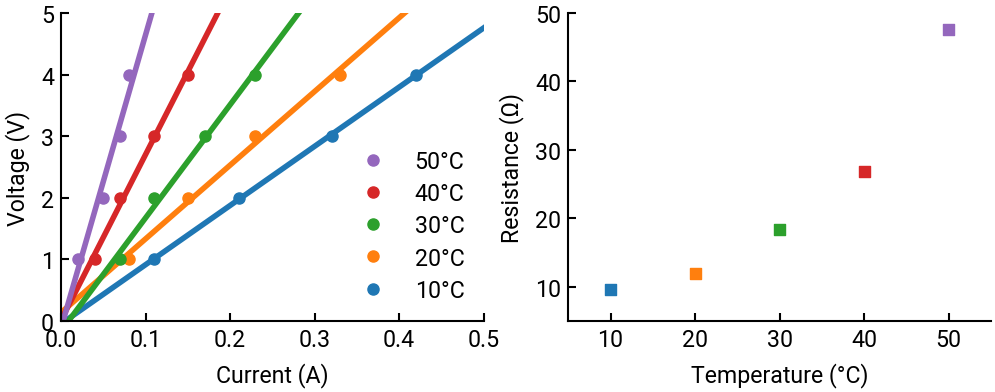

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# data
V = np.array([1, 2, 3, 4])
I10 = np.array([0.11, 0.21, 0.32, 0.42])
I20 = np.array([0.08, 0.15, 0.23, 0.33])
I30 = np.array([0.07, 0.11, 0.17, 0.23])
I40 = np.array([0.04, 0.07, 0.11, 0.15])
I50 = np.array([0.02, 0.05, 0.07, 0.08])
T = [10, 20, 30, 40, 50]

# construct fit
p10 = np.polyfit(I10, V, 1)
p20 = np.polyfit(I20, V, 1)
p30 = np.polyfit(I30, V, 1)
p40 = np.polyfit(I40, V, 1)
p50 = np.polyfit(I50, V, 1)

# plot data
fig, (ax1, ax2) = plt.subplots(figsize=(12,4), ncols=2)   # create two axes! 
ax1.plot(I10, V, 'o', label=f'{T[0]}°C')
ax1.plot(I20, V, 'o', label=f'{T[1]}°C')
ax1.plot(I30, V, 'o', label=f'{T[2]}°C')
ax1.plot(I40, V, 'o', label=f'{T[3]}°C')
ax1.plot(I50, V, 'o', label=f'{T[4]}°C')

# calculate fit lines and plot them
x = np.linspace(0, 0.5, 100)
ax1.plot(x, np.polyval(p10, x), c='C0', zorder=-3)
ax1.plot(x, np.polyval(p20, x), c='C1', zorder=-3)
ax1.plot(x, np.polyval(p30, x), c='C2', zorder=-3)
ax1.plot(x, np.polyval(p40, x), c='C3', zorder=-3)
ax1.plot(x, np.polyval(p50, x), c='C4', zorder=-3)
ax1.legend(reverse=True)
ax1.set(xlabel='Current (A)', ylabel='Voltage (V)', xlim=[0,0.5], ylim=[0,5])

# make the resistance calibration curve - extract the slope from the fit
R = [p10[0], p20[0], p30[0], p40[0], p50[0]]
ax2.scatter(T, R, marker='s', color=[f"C{i}" for i in range(5)])
ax2.set(xlim=[5,55], ylim=[5,50], xlabel="Temperature (°C)", ylabel="Resistance (Ω)")

plt.show()

### Part (b) 

Compute the coefficient of determination for each of the five sets of data.
Note that [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) returns a $m \times m$ matrix of correlation coefficients for all $m$ variables, so we will want to select the off-diagonal terms.

In [9]:
rho10 = np.corrcoef(I10, V)
print(f"The coefficient of determination for 10°C is {rho10[0,1]**2:.4f}.")

rho20 = np.corrcoef(I20, V)
print(f"The coefficient of determination for 20°C is {rho20[0,1]**2:.4f}.")

rho30 = np.corrcoef(I30, V)
print(f"The coefficient of determination for 30°C is {rho30[0,1]**2:.4f}.")

rho40 = np.corrcoef(I40, V)
print(f"The coefficient of determination for 40°C is {rho40[0,1]**2:.4f}.")

rho50 = np.corrcoef(I50, V)
print(f"The coefficient of determination for 50°C is {rho50[0,1]**2:.4f}.")

The coefficient of determination for 10°C is 0.9996.
The coefficient of determination for 20°C is 0.9934.
The coefficient of determination for 30°C is 0.9918.
The coefficient of determination for 40°C is 0.9956.
The coefficient of determination for 50°C is 0.9524.
